In [150]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict






### **`Describe the data`**

In [57]:
loans = pd.read_csv('/content/data.csv')

loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [58]:
len(loans)

9578

In [59]:
loans.isnull().any()


credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [60]:
loans.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [61]:
loans.describe()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [62]:
loans['int.rate'].max()


0.2164

In [63]:
loans['installment'].max()


940.14

### `***Data Visualization***

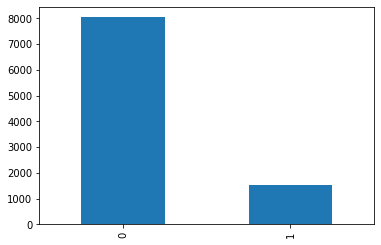

In [64]:
loans['not.fully.paid'].value_counts().plot(kind= 'bar')


In [65]:
loans['not.fully.paid'].value_counts()


0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [66]:
zeros  = 100 * (loans['not.fully.paid'].value_counts()[0]/len(loans))
ones  = 100 * (loans['not.fully.paid'].value_counts()[1]/len(loans))

print(f' The percentage of zero = {zeros}')
print(f' The percentage of one = {ones}')

 The percentage of zero = 83.99457089162664
 The percentage of one = 16.005429108373356


In [67]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [68]:
loans.corr()['not.fully.paid'].sort_values(ascending = False)


not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

In [69]:
loans[loans['not.fully.paid'] == 1]


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
57,1,credit_card,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0,0,1
65,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,1
73,1,small_business,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


### **Prepare** ***the*** ***Data*** ***for*** ***Machine*** ***Learning*** ***Algorithms***



In [70]:
x = loans.drop(["purpose"], axis = 1)
y = loans["purpose"]

In [71]:
undersample = NearMiss()

x_undersample, y_undersample = undersample.fit_resample(x, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [72]:
x.head()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [73]:
print(x_undersample.shape,y_undersample.shape)


(2401, 13) (2401,)


In [74]:
loans_lab = loans_aftersampling['not.fully.paid']
loans_lab

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [75]:
loans_num = loans_aftersampling.drop(['purpose','not.fully.paid'],axis=1)

In [76]:
loans_cat = loans_aftersampling[['purpose']]
loans_cat.head(10)

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card
5,credit_card
6,debt_consolidation
7,all_other
8,home_improvement
9,debt_consolidation


In [77]:
cat_encoder = OneHotEncoder()
loans_cat_hot = cat_encoder.fit_transform(loans_cat)
loans_cat_hot

<9578x7 sparse matrix of type '<class 'numpy.float64'>'
	with 9578 stored elements in Compressed Sparse Row format>

In [78]:
loans_cat_hot.toarray()


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [79]:
num_pipeline = Pipeline([('std_scaler',StandardScaler())])
loans_num_tr = num_pipeline.fit_transform(loans_num)

In [80]:
num_attrs = list(loans_num)
cat_attrs = ['purpose']

fullpipeline = ColumnTransformer([('num',num_pipeline,num_attrs), ('cat',OneHotEncoder(),cat_attrs)])

In [81]:
loans_prepared = fullpipeline.fit_transform(loans_aftersampling)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(loans_prepared,loans_lab,test_size = 0.2, random_state = 0)

## **Logistic regression**




In [95]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [96]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1600   15]
 [ 296    5]]
0.8376826722338204
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1615
           1       0.25      0.02      0.03       301

    accuracy                           0.84      1916
   macro avg       0.55      0.50      0.47      1916
weighted avg       0.75      0.84      0.77      1916



In [97]:
len(y_test)

1916

### ***KNN*** 

In [98]:
LR = KNeighborsClassifier()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [99]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1553   62]
 [ 281   20]]
0.8209812108559499
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1615
           1       0.24      0.07      0.10       301

    accuracy                           0.82      1916
   macro avg       0.55      0.51      0.50      1916
weighted avg       0.75      0.82      0.78      1916



In [135]:
len(y_test)

1916

## ***Naive Bayes***

In [108]:
NB = GaussianProcessClassifier()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

In [109]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1596   19]
 [ 295    6]]
0.8361169102296451
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1615
           1       0.24      0.02      0.04       301

    accuracy                           0.84      1916
   macro avg       0.54      0.50      0.47      1916
weighted avg       0.75      0.84      0.77      1916



In [134]:
len(y_test)

1916

### ***SVM rbf***

In [115]:
SVM = SVC(gamma='auto', kernel='rbf', probability=True)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

In [116]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1615    0]
 [ 301    0]]
0.842901878914405
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1615
           1       0.00      0.00      0.00       301

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ***SVM sigmoid***

In [117]:
SVM = SVC(gamma='auto', kernel='sigmoid', probability=True)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

In [118]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1458  157]
 [ 261   40]]
0.7818371607515657
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1615
           1       0.20      0.13      0.16       301

    accuracy                           0.78      1916
   macro avg       0.53      0.52      0.52      1916
weighted avg       0.75      0.78      0.76      1916



### ***SVM poly***

In [119]:
SVM = SVC(gamma='auto', kernel='poly', probability=True)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

In [120]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1613    2]
 [ 299    2]]
0.842901878914405
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1615
           1       0.50      0.01      0.01       301

    accuracy                           0.84      1916
   macro avg       0.67      0.50      0.46      1916
weighted avg       0.79      0.84      0.77      1916



In [133]:
len(y_test)

1916

### ***DecisionTree***

In [84]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1350  265]
 [ 233   68]]
0.7400835073068893
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1615
           1       0.20      0.23      0.21       301

    accuracy                           0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.75      0.74      0.75      1916



In [86]:
model = DecisionTreeClassifier(max_leaf_nodes=21,random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [87]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1604   11]
 [ 298    3]]
0.8387265135699373
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1615
           1       0.21      0.01      0.02       301

    accuracy                           0.84      1916
   macro avg       0.53      0.50      0.47      1916
weighted avg       0.74      0.84      0.77      1916



In [88]:
model = DecisionTreeClassifier(max_leaf_nodes=7,random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [89]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1610    5]
 [ 299    2]]
0.8413361169102297
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1615
           1       0.29      0.01      0.01       301

    accuracy                           0.84      1916
   macro avg       0.56      0.50      0.46      1916
weighted avg       0.76      0.84      0.77      1916



In [132]:
len(y_test)

1916

### ***RandomForest***

In [136]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)

In [137]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1600   15]
 [ 293    8]]
0.8392484342379958
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1615
           1       0.35      0.03      0.05       301

    accuracy                           0.84      1916
   macro avg       0.60      0.51      0.48      1916
weighted avg       0.77      0.84      0.78      1916



In [138]:
len(y_test)

1916

In [140]:
some_data = loans.iloc[:5]
some_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [142]:
some_labels = loans_lab.iloc[:5]
some_labels

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [143]:
some_data_prepered = fullpipeline.transform(some_data)
some_data_prepered

array([[ 0.49222226, -0.13931753,  2.46309947,  0.68038804,  0.99850529,
         0.68882488,  0.4322297 ,  0.35373245,  0.18270369, -0.71698894,
        -0.29973008, -0.23700318,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.49222226, -0.57886837, -0.43885443,  0.2440308 ,  0.24454045,
        -0.10130263, -0.72123005,  0.49501762,  1.03060231, -0.71698894,
        -0.29973008, -0.23700318,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.49222226,  0.48648368,  0.23070836, -0.90865897, -0.14188468,
        -0.75974223,  0.05976963, -0.39707277, -0.73068304, -0.26247044,
        -0.29973008, -0.23700318,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.49222226, -0.81354383, -0.75702232,  0.68038804, -0.65469699,
         0.03038529, -0.74527749,  0.49632115,  0.90996633, -0.26247044,
        -0.299

In [151]:
print("prediction" , RF.predict(some_data_prepered))
print("Some Lables" , list(some_labels))

k = cross_val_predict(RF , X_train , y_train , cv=3)

prediction [0 0 0 0 0]
Some Lables [0, 0, 0, 0, 0]
